1)Titanic(titanic.csv) data and write down what the columns mean and what values are they composed of?


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# read data as pandas data frame
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2)Which are the two columns with the highest correlation in Titanic data?


In [22]:
def corrFilter(x: pd.DataFrame, bound: 0.5):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(titanic_df, 0)

Fare         Pclass        -0.577147
Age          Pclass        -0.492143
SibSp        Age           -0.091587
Age          Parch         -0.061249
PassengerId  Age           -0.034102
             Pclass        -0.026751
Pclass       SibSp          0.001087
SibSp        PassengerId    0.003818
PassengerId  Fare           0.008211
Parch        Pclass         0.018721
PassengerId  Parch          0.043080
Fare         SibSp          0.171539
             Parch          0.230046
Parch        SibSp          0.306895
Fare         Age            0.337932
PassengerId  PassengerId         NaN
dtype: float64

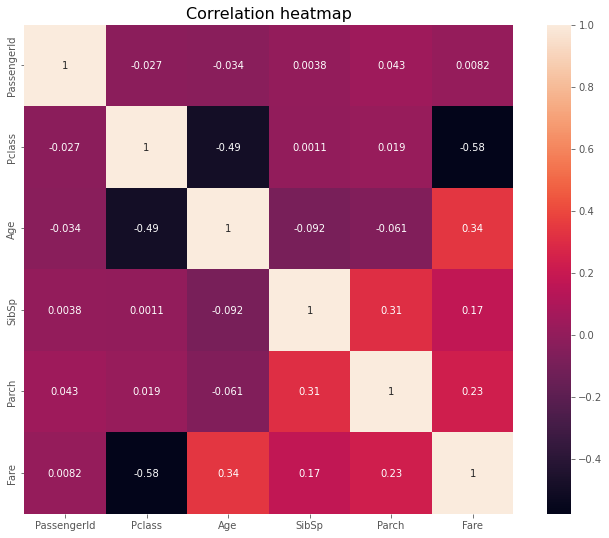

In [5]:
corr_mat = titanic_df.corr()
# create the heatmap plot using seaborn
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, square=True)
plt.title("Correlation heatmap", size=16)
plt.show()

3)For “Fare” columns in Titanic data find
a) maximum, minimum
b) mean
c) mode
d) median and
f) Draw the graph boxplot


In [6]:
titanic_df.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [7]:
print("Median   :", titanic_df['Fare'].median())
print("Mode     :" , titanic_df['Fare'].mode())

Median   : 14.4542
Mode     : 0    7.75
dtype: float64


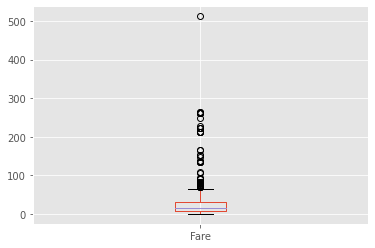

In [8]:
boxplot = titanic_df.boxplot(column=['Fare'], return_type='axes')

4. “penguins”(peguins2.csv) data . Find
   a) How many rows and columns
   b) Find the 2 columns with the highest correlation and draw this in the scatterplot?


In [9]:
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# read data as pandas data frame
penguins_df = pd.read_csv("penguins2.csv")

In [10]:
row_count, column_count = penguins_df.shape
print("Number of rows    :", row_count)
print("Number of columns :", column_count)

Number of rows    : 344
Number of columns : 7


In [24]:
def corrFilter(x: pd.DataFrame, bound: 0):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(penguins_df, 0)

bill_depth_mm      flipper_length_mm   -0.583851
                   body_mass_g         -0.471916
bill_length_mm     bill_depth_mm       -0.235053
                   body_mass_g          0.595110
                   flipper_length_mm    0.656181
flipper_length_mm  body_mass_g          0.871202
bill_length_mm     bill_length_mm            NaN
dtype: float64

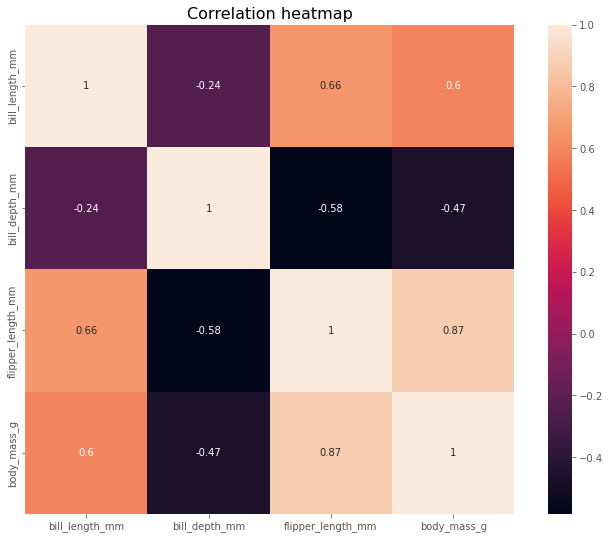

In [11]:
corr_mat = penguins_df.corr()
# create the heatmap plot using seaborn
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, square=True)
plt.title("Correlation heatmap", size=16)
plt.show()

5. The column "bill_length_mm" of penguins data, find:
   a) mean
   b) minimum, maximum
   c) mode
   d) median
   e) Draw the graph boxplot


In [12]:
penguins_df.bill_length_mm.describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [13]:
print("Median :", penguins_df['bill_length_mm'].median())
print("Mode   :", penguins_df['bill_length_mm'].mode())

Median : 44.45
Mode   : 0    41.1
dtype: float64


6. Find the standard deviations of the columns of penguins data in the Seaborn library and interpret the results?


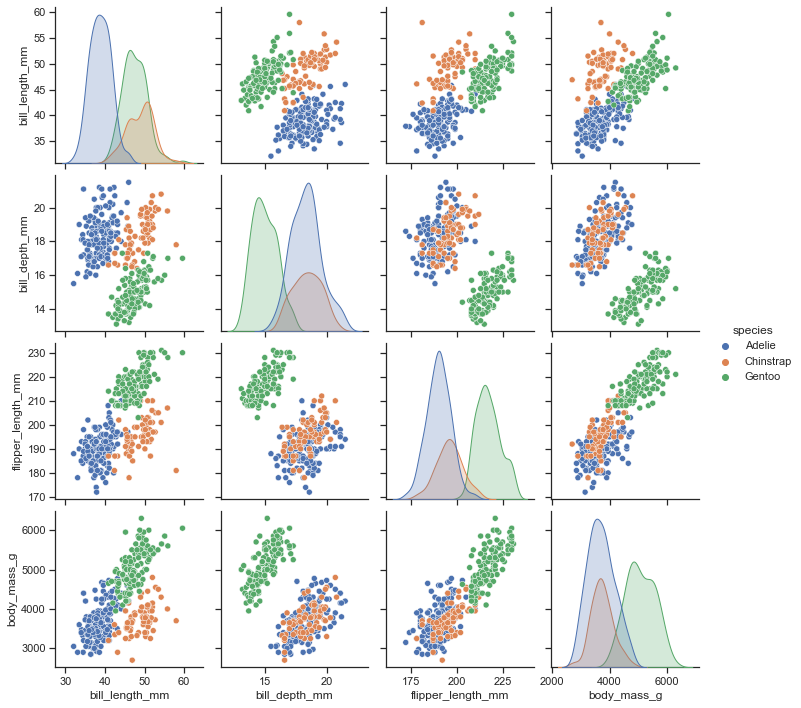

In [25]:
import seaborn as sns
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")